<a href="https://colab.research.google.com/github/Phantom1746a/ChurnModel_ANN/blob/main/ChurnModel_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df= pd.read_csv('Churn.csv')

In [4]:
# declaring dependent and independent variable
x =pd.get_dummies(df.drop(['Churn', 'Customer ID'],axis=1))
y = df['Churn'].apply(lambda x:1 if x=='Yes' else 0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [6]:
X_train.head()

,Senior Citizen,tenure,Monthly Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Total Charges_995.35,Total Charges_996.45,Total Charges_996.85,Total Charges_996.95,Total Charges_997.65,Total Charges_997.75,Total Charges_998.1,Total Charges_999.45,Total Charges_999.8,Total Charges_999.9
6046,0,38,19.60,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
289,1,8,74.50,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
108,0,32,30.15,True,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2373,0,71,90.30,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4249,0,56,90.55,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
y_train.head()

6046    0
289     1
108     0
2373    0
4249    0
Name: Churn, dtype: int64

Import Dependencies

In [22]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score


Build and compile model

In [23]:
#initializing Artificial Neural Network
model = Sequential()
#adding layers to Artificial neural network
model.add(Dense(units = 7, activation = 'relu',input_dim=len(X_train.columns))) #input_dim parameter for the neural network layer to the number of features in the training data (X_train).
model.add(Dense(units = 6, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 46032     
                                                                 
 dense_4 (Dense)             (None, 6)                 48        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 46087 (180.03 KB)
Trainable params: 46087 (180.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
import tensorflow
optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Early stoping
early_stoping=tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       min_delta=0.0001,
                                                       patience=20,
                                                       verbose=1,
                                                       mode='auto',
                                                       baseline=None,
                                                       restore_best_weights=False,
                                                       )


Training and Evaluating model

In [41]:
model_history=model.fit(X_train, y_train, validation_split=0.33 ,epochs=1000, batch_size=10,callbacks=early_stoping)

Epoch 1/1000
378/378 [==============================] - 1s 3ms/step - loss: 0.0256 - accuracy: 0.9875 - val_loss: 0.1363 - val_accuracy: 0.9667
Epoch 2/1000
378/378 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9860 - val_loss: 0.1308 - val_accuracy: 0.9715
Epoch 3/1000
378/378 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.9860 - val_loss: 0.1335 - val_accuracy: 0.9710
Epoch 4/1000
378/378 [==============================] - 1s 3ms/step - loss: 0.0247 - accuracy: 0.9886 - val_loss: 0.2083 - val_accuracy: 0.9409
Epoch 5/1000
378/378 [==============================] - 1s 3ms/step - loss: 0.0243 - accuracy: 0.9870 - val_loss: 0.1431 - val_accuracy: 0.9683
Epoch 6/1000
378/378 [==============================] - 1s 3ms/step - loss: 0.0248 - accuracy: 0.9891 - val_loss: 0.1457 - val_accuracy: 0.9699
Epoch 7/1000
378/378 [==============================] - 2s 5ms/step - loss: 0.0249 - accuracy: 0.9883 - val_loss: 0.1393 - val_accuracy:

In [45]:
model_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

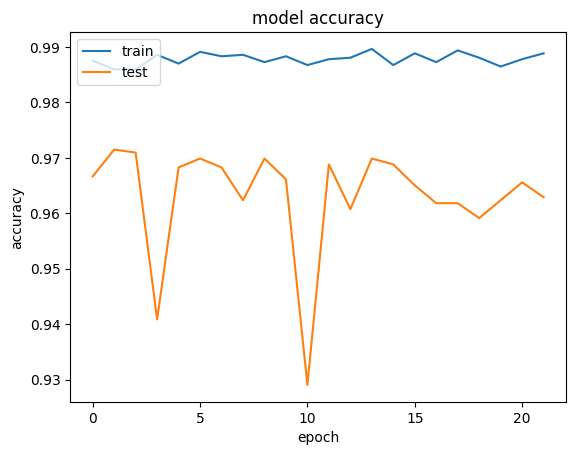

In [46]:
# ploting history
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

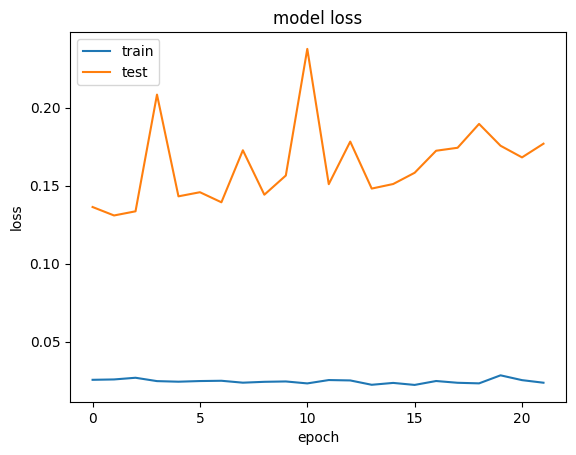

In [53]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
y_pred = model.predict(X_test)
y_pred = [0 if val < 0.5 else 1 for val in y_pred]

45/45 [==============================] - 0s 2ms/step


In [50]:
accuracy_score(y_test,y_pred)

0.7608232789212207

In [51]:
#making confousion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

<Axes: >

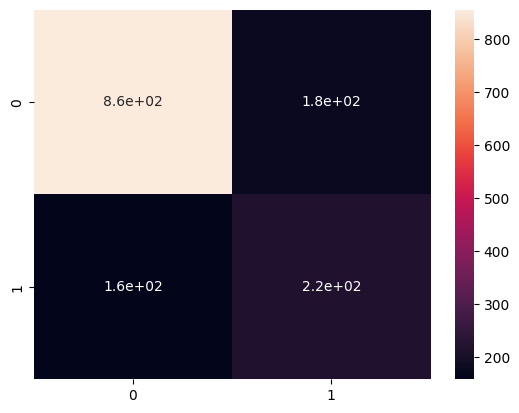

In [52]:
#ploting confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True)

In [54]:
# get the weights
model.get_weights()

[array([[-1.86236333e-02,  3.94104933e-03,  5.28681353e-02, ...,
         -1.65424161e-02, -1.42459460e-02,  2.66802199e-02],
        [-2.23510936e-02,  1.85317092e-03, -7.56403059e-03, ...,
         -7.54682347e-04,  6.06407924e-03, -2.12921575e-02],
        [-1.51600072e-03, -1.43756354e-02,  8.98184907e-03, ...,
         -1.33019835e-02, -3.11649069e-02, -1.69094317e-02],
        ...,
        [ 2.06432641e-02, -3.25484946e-03,  5.40374041e-01, ...,
          1.45075172e-02,  2.66522169e-04,  2.58951262e-03],
        [ 1.03948340e-02,  1.61801688e-02, -1.11125362e+00, ...,
         -5.10951504e-04,  1.84364989e-02, -1.92160346e-02],
        [ 5.36917523e-03,  1.07847154e-04, -9.01646316e-01, ...,
         -2.43678745e-02, -2.83808894e-02,  8.60327110e-03]], dtype=float32),
 array([-0.00908593, -0.01604416,  0.02226926, -0.01208647,  0.        ,
        -0.0191868 ,  0.        ], dtype=float32),
 array([[-0.15297095,  0.22518861, -0.5451661 , -0.61634296,  0.44706953,
         -0.1634

Saving model

In [55]:
model.save('ChurnModel_ANN')